# 20MAI0038
# Rahul Laxman Vasanad

# 1. Load all the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading and Exploration

In [2]:
# Loading train dataset of Digit Recognizer
df_train = pd.read_csv('train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [3]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
# Normalize inputs
X_train = X_train / 255.0

# 3. Plot Digits

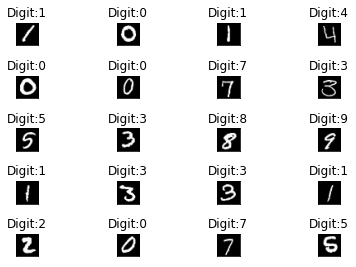

In [7]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(X_train, Y_train)

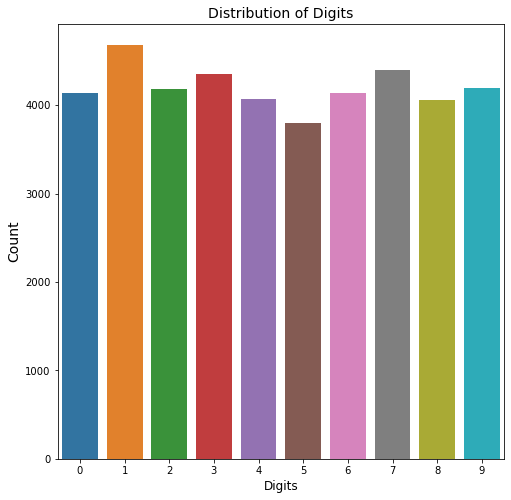

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

# 4. Spliting of Data

In [9]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values


In [10]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

# 5. Building LeNet-5 Architecture

Let's decode the operations we will be performing in each layer
First Layer: Convolutional Layer (CONV1):

Parameters: Input (N) = 28, Padding (P) = 2, Filter (F) = 5 x 5, Stride (S) = 1

Conv Operation: ((N + 2P - F) / S) + 1 = ((28 + 4 - 5) / 1) + 1 = 28 x 28

We will apply 6 filters / kernels so we will get a 28 x 28 x 6 dimensional output


Second Layer: Average Pooling Layer (POOL1):

Parameters: Input (N) = 28, Filter (F) = 2 x 2, Stride (S) = 2

AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((28 - 2) / 2) + 1 = 14 x 14

We will have a 14 x 14 x 6 dimensional output at the end of this pooling


Third Layer: Convolutional Layer (CONV2):

Parameters: Input (N) = 14, Filter (F) = 5 x 5, Stride (S) = 1

Conv Operation: ((N + 2P - F) / S) + 1 = ((14 - 5) / 1) + 1 = 10 x 10

We will apply 16 filters / kernels so we will get a 10 x 10 x 16 dimensional output


Fourth Layer: Average Pooling Layer (POOL2):

Parameters: Input (N) = 10, Filter (F) = 2 x 2, Stride (S) = 2

AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((10 - 2) / 2) + 1 = 5 x 5

We will have a 5 x 5 x 16 dimensional output at the end of this pooling


Fifth Layer: Fully Connected layer(FC1):

Parameters: W: 400 * 120, b: 120

We will have an output of 120 x 1 dimension


Sixth Layer: Fully Connected layer(FC2):

Parameters: W: 120 * 84, b: 84

We will have an output of 84 x 1 dimension


Seventh Layer: Output layer(Softmax):

Parameters: W: 84 * 10, b: 10

We will get an output of 10 x 1 dimension

In [15]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [16]:
#Model summary
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [17]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [18]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [19]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

# 6. Train the model

In [20]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=10, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
408/407 [==============================] - 40s 99ms/step - loss: 0.7240 - accuracy: 0.7728 - val_loss: 0.1808 - val_accuracy: 0.9452
Epoch 2/10
408/407 [==============================] - 46s 112ms/step - loss: 0.2322 - accuracy: 0.9296 - val_loss: 0.1609 - val_accuracy: 0.9508
Epoch 3/10
408/407 [==============================] - 47s 114ms/step - loss: 0.1787 - accuracy: 0.9453 - val_loss: 0.1376 - val_accuracy: 0.9635
Epoch 4/10
408/407 [==============================] - 46s 113ms/step - loss: 0.1477 - accuracy: 0.9540 - val_loss: 0.1141 - val_accuracy: 0.9683
Epoch 5/10
408/407 [==============================] - 49s 121ms/step - loss: 0.1311 - accuracy: 0.9594 - val_loss: 0.0994 - val_accuracy: 0.9683
Epoch 6/10
408/407 [==============================] - 47s 114ms/step - loss: 0.1147 - accuracy: 0.9647 - val_loss: 0.0930 - val_accuracy: 0.9738
Epoch 7/10
408/407 [==============================] - 5

In [21]:
score = model.evaluate(X_val, T_val, batch_size=32)

40/40 [==============================] - 0s 8ms/step - loss: 0.0602 - accuracy: 0.9857


In [22]:
# Loss and Accuracy Score
score

[0.060167934745550156, 0.9857142567634583]

# 7. Predict Test Data

In [23]:
df_test = pd.read_csv('test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [24]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

In [25]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 9, 3], dtype=int64)

# 8.Create Submission File

In [26]:
df_out = pd.read_csv('sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [27]:
df_out.to_csv('out.csv', index=False)

In [29]:
output = pd.read_csv('out.csv')

In [30]:
#Output File which is created with each digit and it's corresponding label
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
